In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, '_mixed_effects')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = False

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.30,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head() 

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
0,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.30,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
df_rq1 = df_results.query("kind=='BAH' & sampling=='nodes'")
df_rq1.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
0,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.30,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h3>Network structure vs. Global performance</h3>

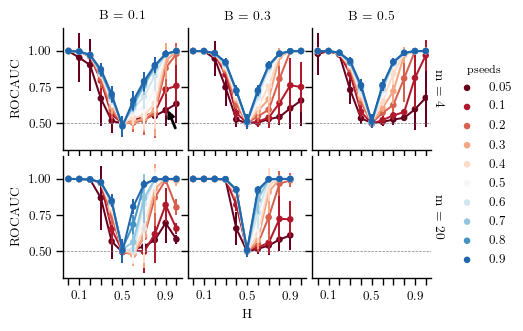

In [7]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==2000"), columns, fn=fn)

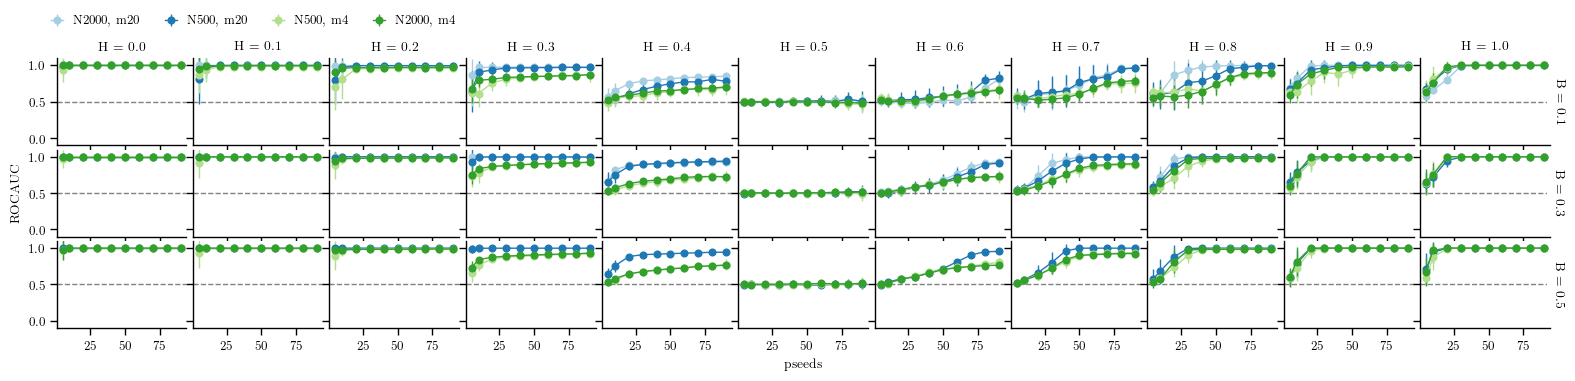

In [8]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [9]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

../results-batch/_mixed_effects/y_observed.pickle loaded!
../results-batch/_mixed_effects/fe_params.pickle loaded!
../results-batch/_mixed_effects/random_effects.pickle loaded!
../results-batch/_mixed_effects/mdf.pickle loaded!
../results-batch/_mixed_effects/params.pickle loaded!
../results-batch/_mixed_effects/X.pickle loaded!
../results-batch/_mixed_effects/Y.pickle loaded!
../results-batch/_mixed_effects/Z.pickle loaded!


In [10]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: rocauc   
No. Observations: 1830    Method:             REML     
No. Groups:       110     Scale:              0.0023   
Min. group size:  11      Likelihood:         2642.5345
Max. group size:  54      Converged:          Yes      
Mean group size:  16.6                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.772    0.018 43.743 0.000  0.737  0.806
N             0.000    0.000  9.396 0.000  0.000  0.000
density       0.622    0.048 12.971 0.000  0.528  0.716
B             0.090    0.007 12.550 0.000  0.076  0.105
Group Var     0.032    0.094                           
=======================================================

"""

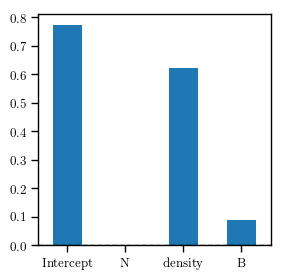

In [11]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

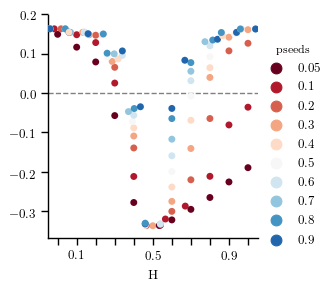

In [12]:
fn = None
viz.plot_random_effects(random_effects, params['group_vars'], fn)

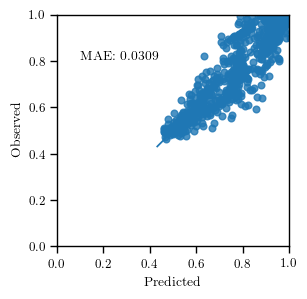

In [13]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.0021790761294301596
The RMSE of LMM is 0.04668057550448751
The MAE of LMM is 0.030859089752238382


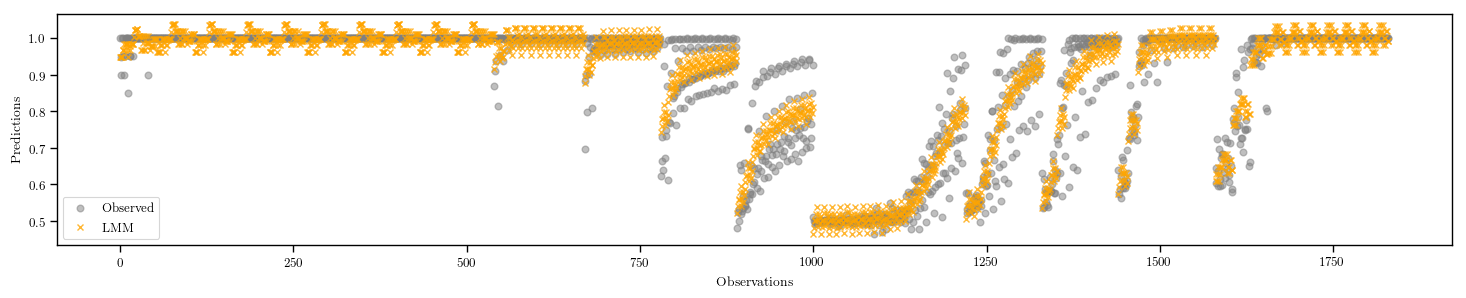

In [14]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Real World vs. Model</h3>

In [15]:
df_realworld = df_results.query("kind!='BAH' & sampling=='nodes'").copy()
df_realworld = prediction.setup(df_realworld)
df_realworld = df_realworld.append(prediction.predict_allrows(df_realworld, mdf, params), ignore_index=True)
df_realworld.sample(5)

,source,dataset,N,m,density,B,H,sampling,pseeds,ROCAUC,epoch
65,data,Caltech36,701,1,0.063028,0.33,0.56,nodes,0.6,0.631764,6
717,model,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.1,0.537325,8
512,model,Swarthmore42,1519,1,0.046600,0.49,0.53,nodes,0.1,0.577160,3
663,model,USF51,1705,1,0.010737,0.40,0.45,nodes,0.6,0.683424,4
311,data,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.1,0.560391,2


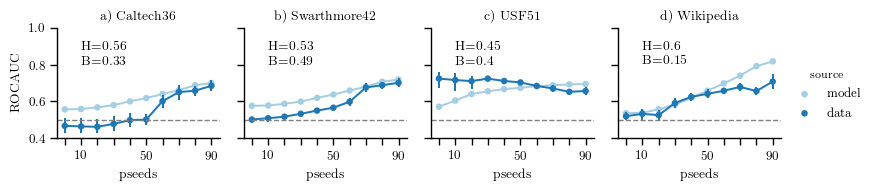

In [16]:
fn = None
viz.plot_model_vs_data(df_realworld, fn)

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [17]:
df_rq2 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
300,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.70,...,0.015885,-0.015885,-0.007286,0.000428,0.000428,0.000053,0.000252,-0.000199,0.000305,0.000733
301,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.70,...,0.015885,-0.015885,-0.007286,0.000428,0.000428,0.000053,0.000252,-0.000199,0.000305,0.000733
302,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
303,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
304,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.30,...,0.006680,-0.006680,-0.043030,0.001336,0.001336,0.001852,0.000045,0.001807,0.001896,0.003232


<h3>Global performance</h3>

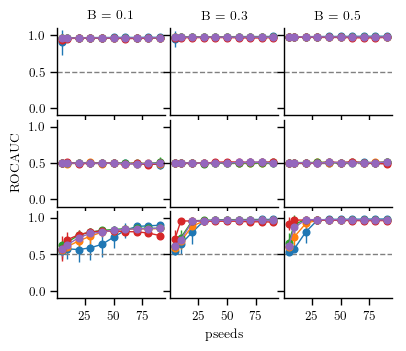

In [18]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_sampling(df_rq2, columns, fn=fn)

<h3>Quality of estimation</h3>

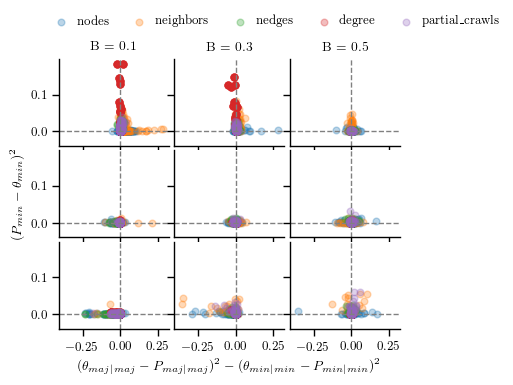

In [19]:
fn = None
viz.plot_SEp1_vs_SEcpDiff_per_H_B_sampling(df_rq2, columns, fn)

<h3>Utility of estimation</h3>

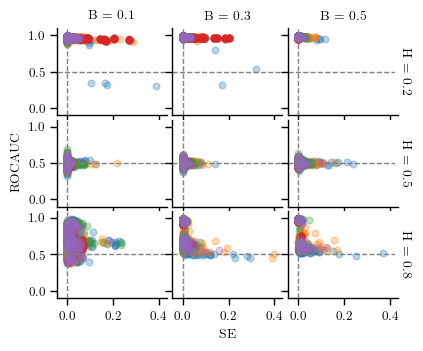

In [20]:
fn = None
viz.plot_rocauc_vs_SE_per_H_B_sampling(df_rq2, columns, fn)

<h3>Comparison of estimation errors per sample method (small samples)</h3>

In [21]:
# Available metrics:
# --------------------------------------------------------------------------
## Estimation error: estimated - observed
# - 'EEp1','EEp0',      # prior error
# - 'EEcp00','EEcp10',  # conditional prob. x given majority error
# - 'EEcp11','EEcp01',  # conditional prob. x given minority error
## Squared Error: (estimated - observed)^2
# - 'SEp1',
# - 'SEcp00',
# - 'SEcp11',
## Overall Errors
# - 'SEcpDiff', # Diff of the 2 cp SE
# - 'SEcpSum',  # Sum of all 2 cp SE
# - 'SE',       # sum of all 3 SE


In [22]:
pseeds = 0.4
B = 0.1 # unbalanced
#B = 0.5 # balanced

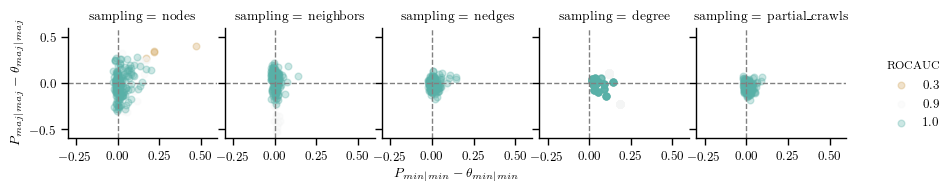

In [23]:
# Heterophilic
H = 0.2
fn = None
viz.plot_estimation_errors_per_rocauc_sampling(df_rq2.query('pseeds<@pseeds & H==@H & B==@B'), columns, 
                                               metricx='EEcp11', metricy='EEcp00', fn=fn)

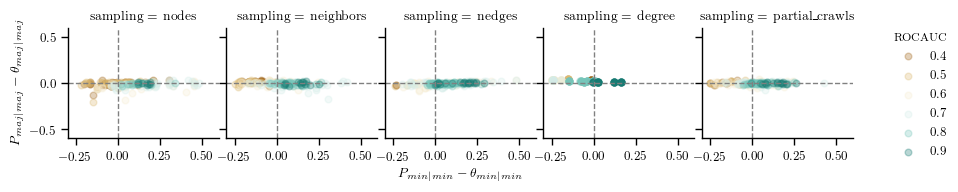

In [24]:
# Homophilic
H = 0.8
fn = None
viz.plot_estimation_errors_per_rocauc_sampling(df_rq2.query('pseeds<@pseeds & H==@H & B==@B'), columns, 
                                               metricx='EEcp11', metricy='EEcp00', fn=fn)

<h3>Comparison of estimation errors per netwok (small samples)</h3>

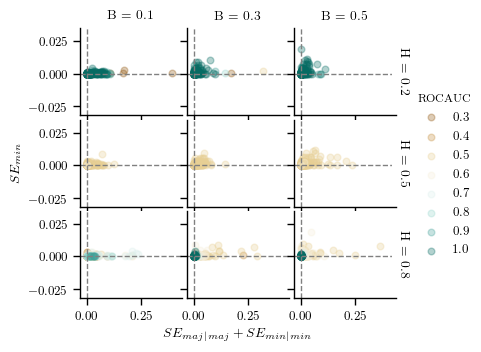

In [25]:
all_sampling_methods = False
fn = None
viz.plot_estimation_error_per_H_B_rocauc(df_rq2, columns, 'SEcpSum', 'SEp1', pseeds, all_sampling_methods, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [26]:
df_rq3 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] & pseeds < 0.4")
df_rq3.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
302,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
303,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
304,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.30,...,0.006680,-0.006680,-0.043030,0.001336,0.001336,0.001852,0.000045,0.001807,0.001896,0.003232
305,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.20,...,0.027041,-0.027041,-0.037175,0.001046,0.001046,0.001382,0.000731,0.000651,0.002113,0.003159
307,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604


<h3>Performance Bias</h3>

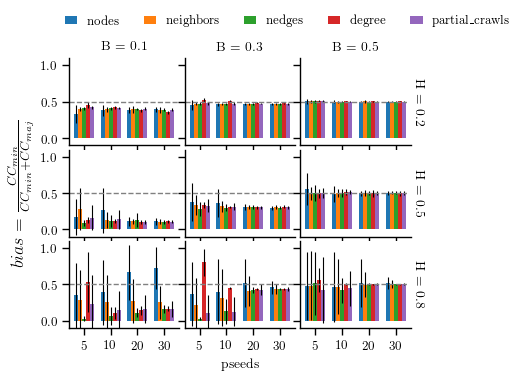

In [27]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)